# Filtro Geométrico

#### Importação de Libs

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Funções auxiliares

In [32]:
def renormalize(img):
    """
    Função de normalização de Imagens
    """
    img_norm = img - np.min(img)
    img_norm = img_norm/np.max(img_norm)
    img_norm = 255*img_norm
    img_norm = img_norm.astype(np.uint8)
    
    # O mesmo que acima em um único comando
    # img_norm = (255*(img-np.min(img))/(np.max(img)-np.min(img))).astype(np.uint8)
    
    return img_norm

## Exemplo Imagem Grayscale

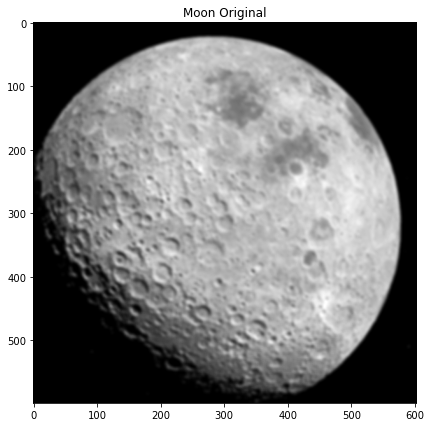

In [22]:
img = plt.imread('images/moon.tiff')
plt.figure(figsize=[7,7])
plt.title('Moon Original')
plt.imshow(img, 'gray')

#### Definição de Variáveis

In [9]:
filter_size = 5
filter_size_ext = filter_size // 2

num_rows, num_cols = img.shape[:2]
dim = img.shape[2] if (len(img.shape) == 3) else 1

# expoente da raíz
exp_root = 1 / (filter_size ** 2)

In [8]:
# Adicionando um pad para a imagem
img_ext = np.pad(img, (filter_size_ext, filter_size_ext), mode='wrap')
# Alocar imagem de retorno
img_filtered = np.zeros((num_rows, num_cols, dim))

In [10]:
for i in range(dim):
            for row in range(num_rows):
                for col in range(num_cols):
                    mult = np.product(img_ext[row:row + filter_size,
                                      col:col + filter_size],
                                      dtype=np.longdouble)
                    img_filtered[row, col] = mult**exp_root

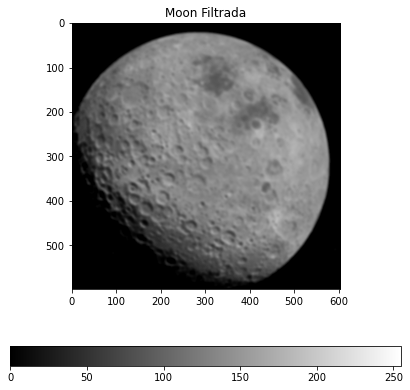

In [15]:
plt.figure(figsize=[7,7])
plt.title('Moon Filtrada')
plt.imshow(img_filtered,'gray', vmin=0, vmax=255)
plt.colorbar(orientation="horizontal")

## Exemplo para imagens coloridas

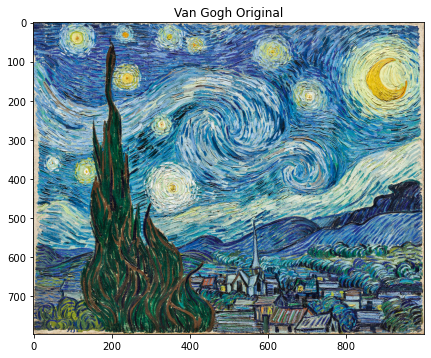

In [23]:
img = plt.imread('images/VanGoghStarryNight.jpg')
plt.figure(figsize=[7,7])
plt.title('Van Gogh Original')
plt.imshow(img)

In [18]:
filter_size = 5
filter_size_ext = filter_size // 2

num_rows, num_cols = img.shape[:2]
dim = img.shape[2] if (len(img.shape) == 3) else 1

# expoente da raíz
exp_root = 1 / (filter_size ** 2)

In [19]:
# Adicionando um pad para a imagem
img_ext = np.pad(img, (filter_size_ext, filter_size_ext), mode='wrap')
# Alocar imagem de retorno
img_filtered = np.zeros((num_rows, num_cols, dim))

In [20]:
for i in range(dim):
            for row in range(num_rows):
                for col in range(num_cols):
                    mult = np.product(img_ext[row:row + filter_size,
                                      col:col + filter_size],
                                      dtype=np.longdouble)
                    img_filtered[row, col] = mult**exp_root

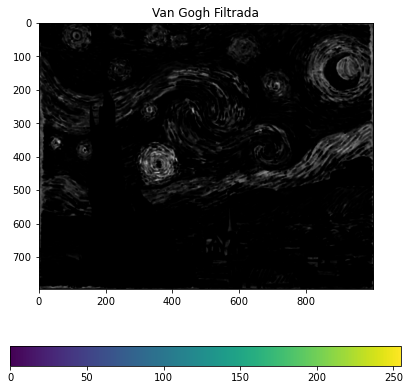

In [38]:
plt.figure(figsize=[7,7])
plt.title('Van Gogh Filtrada')
plt.imshow(renormalize(img_filtered))
plt.colorbar(orientation="horizontal")

## Definição de uma função auxiliar
Uma definição de uma função que agrupa os conceitos observados no experimento de média geométrica

In [28]:
def filtro_geometrico(img, filter_size):
    """
    Desc.: Implemeta o filtro de média geométrica.
    I: Uma imagem(img) e o tamanho do filtro(filter_size).
    O: A imagem X resultante da aplicação do filtro.
    """
    filter_size_ext = filter_size // 2
    num_rows, num_cols = img.shape[:2]
    dim = img.shape[2] if (len(img.shape) == 3) else 1

    img_ext = np.pad(img, (filter_size_ext, filter_size_ext), mode='wrap')

    # Essa variável armazenará a imagem resultante.
    img_filtered = np.zeros((num_rows, num_cols, dim))

    exp_root = 1 / (filter_size ** 2)
    # Para imagens coloridas, temos de calcular a suavização para os 3 níveis RGB, senão a trasparência...
    if len(img.shape) >= 3:
        for i in range(dim):
            for row in range(num_rows):
                for col in range(num_cols):
                    mult = np.product(img_ext[row:row + filter_size,
                                      col:col + filter_size, i],
                                      dtype=np.longdouble)
                    img_filtered[row, col, i] = mult**exp_root
    # Já em caso de imagens monocromáticas, uma única dimensão deve ser processada.
    else:
        # Processo idêntico ao anterior, no entanto, adaptado a apenas uma dimensão.
        for i in range(dim):
            for row in range(num_rows):
                for col in range(num_cols):
                    mult = np.product(img_ext[row:row + filter_size,
                                      col:col + filter_size],
                                      dtype=np.longdouble)
                    img_filtered[row, col] = mult**exp_root
                    
    return img_filtered